In [1]:
import math

A1 = 9.8 / 2
A2 = 10
A3 = 10.25
D3 = 5.9
D4 = 15

D1_MIN = 0
D1_MAX = 45

THETA2_MIN_VAL = -100
THETA2_MAX_VAL = 100
THETA3_MIN_VAL = -135
THETA3_MAX_VAL = 135
THETA4_MIN_VAL = -180
THETA4_MAX_VAL = 180

THETA2 = 0
THETA3 = 0
THETA4 = 0

x_direct_kin = A1 + A2 * math.cos(math.radians(THETA2)) + A3 * math.cos(math.radians(THETA2 + THETA3))
y_direct_kin = A2 * math.sin(math.radians(THETA2)) + A3 * math.sin(math.radians(THETA2 + THETA3))

print(f"x_direct_kin = {x_direct_kin}")
print(f"y_direct_kin = {y_direct_kin}")

x_direct_kin = 25.15
y_direct_kin = 0.0


In [2]:
from ipywidgets import interact, FloatSlider
import matplotlib.pyplot as plt
import numpy as np

def plot_arm(theta2, theta3, theta4):
    # Convert degrees to radians
    theta2_rad = math.radians(theta2)
    theta3_rad = math.radians(theta3)
    theta4_rad = math.radians(theta4)

    # Calculate joint positions
    x0, y0 = 0, 0
    x1, y1 = A1, 0  # Fixed base offset
    x2, y2 = x1 + A2 * math.cos(theta2_rad), y1 + A2 * math.sin(theta2_rad)
    x3, y3 = x2 + A3 * math.cos(theta2_rad + theta3_rad), y2 + A3 * math.sin(theta2_rad + theta3_rad)

    plt.figure(figsize=(8, 8))
    plt.plot([x0, x1], [y0, y1], 'o-', label='Base Offset') # Base to joint 1
    plt.plot([x1, x2], [y1, y2], 'o-', label='Link 2 (A2)') # Joint 1 to joint 2
    plt.plot([x2, x3], [y2, y3], 'o-', label='Link 3 (A3)') # Joint 2 to joint 3

    plt.plot(x3, y3, 'rx', markersize=10, label='End Effector') # Mark end effector position

    plt.xlim(-0.5, 0.5)
    plt.ylim(-0.5, 0.5)
    plt.xlabel('X Position (cm)')
    plt.ylabel('Y Position (cm)')
    plt.title('2D Robotic Arm Plot')
    plt.grid(True)
    plt.axis('equal')
    plt.legend()
    plt.show()

# Interactive sliders
interact(plot_arm,
         theta2=FloatSlider(min=THETA2_MIN_VAL, max=THETA2_MAX_VAL, step=1, value=THETA2, description='Theta 2 (°):'),
         theta3=FloatSlider(min=THETA3_MIN_VAL, max=THETA3_MAX_VAL, step=1, value=THETA3, description='Theta 3 (°):'),
         theta4=FloatSlider(min=THETA4_MIN_VAL, max=THETA4_MAX_VAL, step=1, value=THETA4, description='Theta 4 (°):')
        );


interactive(children=(FloatSlider(value=0.0, description='Theta 2 (°):', min=-100.0, step=1.0), FloatSlider(va…

In [3]:
def inverse_kinematics(x, y):
    # Calculate the distance from the shoulder (base_x, base_y) to the target (x, y)
    base_x, base_y = A1, 0
    dx = x - base_x
    dy = y - base_y
    D = math.sqrt(dx**2 + dy**2)

    # Check if the target is reachable
    if D > (A2 + A3):
        print("Warning: Target out of reach!")
        # Return values that indicate inability to reach
        return None, None, None, None

    # Calculate theta3 (two solutions)
    # Using the Law of Cosines to find the angle at the elbow joint
    # cos(theta_elbow) = (A2^2 + A3^2 - D^2) / (2 * A2 * A3)
    # theta_elbow = pi - theta3
    # cos(pi - theta3) = -cos(theta3)
    cos_theta3_1 = (D**2 - A2**2 - A3**2) / (2 * A2 * A3)

    # Clamp the value to the valid range [-1, 1] to avoid issues with floating point precision
    cos_theta3_1 = max(-1, min(1, cos_theta3_1))
    theta3_rad_1 = math.acos(cos_theta3_1)
    theta3_deg_1 = math.degrees(theta3_rad_1)

    # The second solution for theta3 is the negative of the first
    theta3_deg_2 = -theta3_deg_1


    # Calculate theta2 (two solutions, corresponding to the two theta3 solutions)
    # Using the Law of Cosines and the Atan2 function

    # Solution 1 (Elbow Up or Down)
    # Angle of the vector from base to target relative to the x-axis
    alpha = math.atan2(dy, dx)

    # Angle formed by link 2 and the line from base to target
    beta_1 = math.acos((A2**2 + D**2 - A3**2) / (2 * A2 * D))

    theta2_rad_1 = alpha - beta_1
    theta2_deg_1 = math.degrees(theta2_rad_1)

    # Solution 2 (The other Elbow position)
    beta_2 = -beta_1 # For the second theta3 solution, the beta angle is the negative
    theta2_rad_2 = alpha - beta_2
    theta2_deg_2 = math.degrees(theta2_rad_2)

    theta4 = 0 # Placeholder, as theta4 affects orientation, not just position in this simplified model

    return theta2_deg_1, theta3_deg_1, theta2_deg_2, theta3_deg_2

def interactive_inverse_kinematics(target_x, target_y):
    theta2_1, theta3_1, theta2_2, theta3_2 = inverse_kinematics(target_x, target_y)

    if theta2_1 is not None:
        print(f"Target X: {target_x:.2f}, Target Y: {target_y:.2f}")
        print(f"Solution 1: Theta2 = {theta2_1:.2f}°, Theta3 = {theta3_1:.2f}°")
        print(f"Solution 2: Theta2 = {theta2_2:.2f}°, Theta3 = {theta3_2:.2f}°")

        plot_arm(theta2_1, theta3_1, 0) # Using a placeholder 0 for theta4
    else:
        print(f"Could not reach target X: {target_x:.2f}, Target Y: {target_y:.2f}")
        # Optionally, plot the arm in a default position or indicate impossibility
        plot_arm(0, 0, 0) # Plotting a default position

# Interactive sliders for the target coordinates
interact(interactive_inverse_kinematics,
         target_x=FloatSlider(min=-30, max=30, step=0.1, value=20, description='Target X:'),
         target_y=FloatSlider(min=-30, max=30, step=0.1, value=15, description='Target Y:')
        );

interactive(children=(FloatSlider(value=20.0, description='Target X:', max=30.0, min=-30.0), FloatSlider(value…

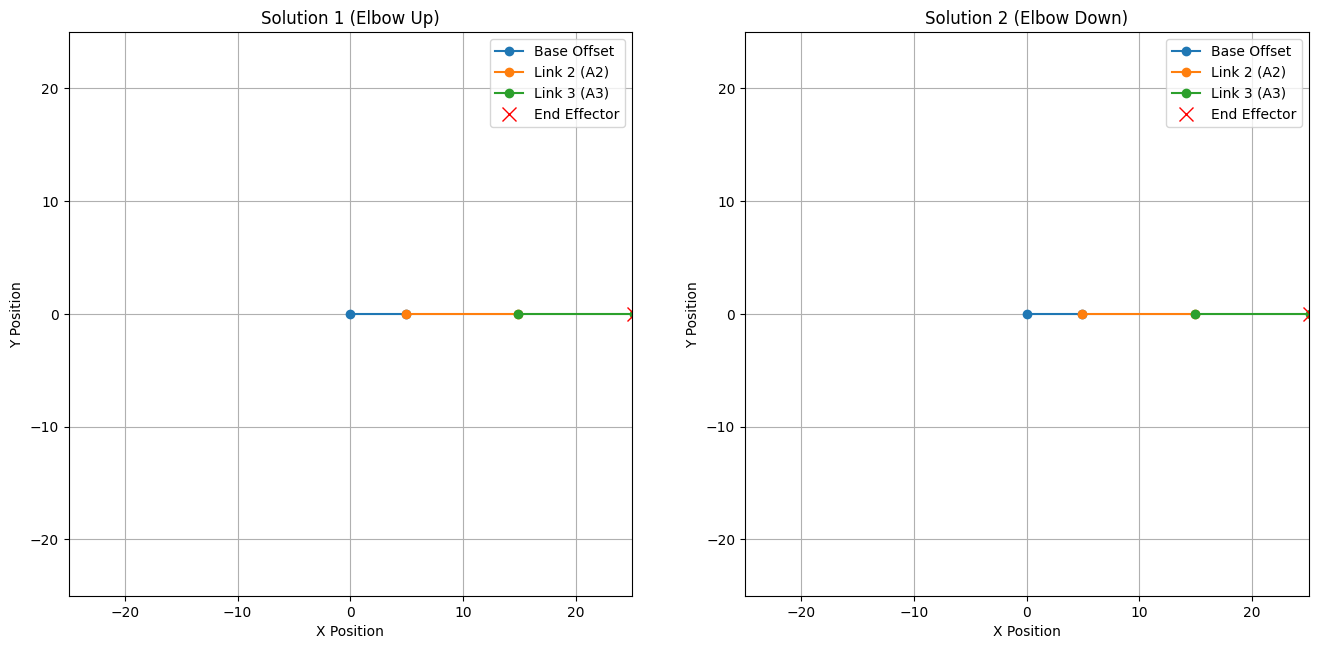

interactive(children=(FloatSlider(value=10.0, description='Target X:', max=30.0, min=-30.0), FloatSlider(value…

In [4]:
# prompt: using an interactive slider, now define the coordinates of the point, and using the inverse kinematics obtain the variable angles and print the plot arm. While obtaining theta3_1 and theta3_2 through cosine law

def inverse_kinematics(x, y):
    # Calculate the distance from the shoulder (base_x, base_y) to the target (x, y)
    base_x, base_y = A1, 0
    dx = x - base_x
    dy = y - base_y
    D_squared = dx**2 + dy**2
    print(f"x: {x}")
    print(f"y: {y}")
    print(f"D_squared: {D_squared}")

    D = math.sqrt(D_squared)
    print(f"D: {D}")

    # Check if the target is reachable
    if D > (A2 + A3) or D < abs(A2 - A3): # Also check if target is too close
        print("Warning: Target out of reach!")
        return None, None, None, None

    # Calculate theta3 (two solutions) using the Law of Cosines
    # c^2 = a^2 + b^2 - 2ab*cos(C)
    # D^2 = A2^2 + A3^2 - 2*A2*A3*cos(pi - theta3)
    # D^2 = A2^2 + A3^2 + 2*A2*A3*cos(theta3)
    # cos(theta3) = (D^2 - A2**2 - A3**2) / (2 * A2 * A3)
    cos_theta3 = (D_squared - A2**2 - A3**2) / (2 * A2 * A3)
    print(f"cos_theta3: {cos_theta3}")
    # Clamp the value to the valid range [-1, 1] to avoid issues with floating point precision
    cos_theta3 = max(-1.0, min(1.0, cos_theta3))

    # Two possible solutions for theta3 based on the sign of the angle
    # Using atan2 with the calculated cos_theta3 and sqrt(1 - cos_theta3**2) for sin_theta3
    theta3_rad_1 = math.atan2(math.sqrt(max(0, 1 - cos_theta3**2)), cos_theta3)
    theta3_deg_1 = math.degrees(theta3_rad_1)
    print(f"theta3_deg_1: {theta3_deg_1}")

    # The second solution for theta3 corresponds to the 'elbow down' configuration
    theta3_deg_2 = -theta3_deg_1 # Or math.degrees(math.atan2(-math.sqrt(max(0, 1 - cos_theta3**2)), cos_theta3))
    print(f"theta3_deg_2: {theta3_deg_2}")



    # Calculate theta2 (two solutions, corresponding to the two theta3 solutions)
    print(f"calculating theta2")
    # Using Atan2 and the Law of Cosines

    # Angle of the vector from base to target relative to the x-axis
    alpha = math.atan2(dy, dx)
    print(f"dy: {dy}")
    print(f"dx: {dx}")
    print(f"alpha: {alpha}")

    # Angle formed by link 2 and the line from base to target
    # Using the Law of Cosines: A3**2 = A2**2 + D**2 - 2*A2*D*cos(beta)
    # cos(beta) = (A2**2 + D**2 - A3**2) / (2 * A2 * D)
    cos_beta = (A2**2 + D_squared - A3**2) / (2 * A2 * D)
    print(f"cos_beta: {cos_beta}")
    # Clamp the value
    cos_beta = max(-1.0, min(1.0, cos_beta))

    beta = math.acos(cos_beta)
    print(f"beta: {beta}")

    # Solution 1 for theta2 (Elbow Up, corresponding to theta3_deg_1)
    theta2_rad_1 = alpha - beta
    theta2_deg_1 = math.degrees(theta2_rad_1)
    print(f"theta2_deg_1: {theta2_deg_1}")

    # Solution 2 for theta2 (Elbow Down, corresponding to theta3_deg_2)
    # This corresponds to beta being negative in the alpha +/- beta calculation
    theta2_rad_2 = alpha + beta
    theta2_deg_2 = math.degrees(theta2_rad_2)
    print(f"theta2_deg_2: {theta2_deg_2}")


    # Theta4 is not determined by the target (x,y) point in a 2D arm without orientation control.
    # It typically controls the wrist orientation relative to the third link.
    # We can return a default value or indicate it's not calculated from position.
    theta4 = 0 # Placeholder

    return theta2_deg_1, theta3_deg_1, theta2_deg_2, theta3_deg_2

# Create a figure with two subplots for side-by-side plotting
fig, axes = plt.subplots(1, 2, figsize=(16, 8)) # 1 row, 2 columns

# Initialize lines and end effectors for both subplots
lines1 = [ax.plot([], [], 'o-', label='Base Offset')[0] for ax in axes]
lines2 = [ax.plot([], [], 'o-', label='Link 2 (A2)')[0] for ax in axes]
lines3 = [ax.plot([], [], 'o-', label='Link 3 (A3)')[0] for ax in axes]
end_effectors = [ax.plot([], [], 'rx', markersize=10, label='End Effector')[0] for ax in axes]

# Set initial plot limits and labels
for ax in axes:
    ax.set_xlim(-25, 25)  # Adjusted limits
    ax.set_ylim(-25, 25)
    ax.set_xlabel('X Position')
    ax.set_ylabel('Y Position')
    ax.set_aspect('equal', adjustable='box')
    ax.grid(True)
    ax.legend() # Add legend to initial plot


def update_plot_side_by_side(theta2_1, theta3_1, theta2_2, theta3_2, ax_index):
    """Updates a specific subplot with the given arm configuration."""
    ax = axes[ax_index]
    line1, line2, line3 = lines1[ax_index], lines2[ax_index], lines3[ax_index]
    end_effector = end_effectors[ax_index]

    theta2_rad = math.radians(theta2_1 if ax_index == 0 else theta2_2)
    theta3_rad = math.radians(theta3_1 if ax_index == 0 else theta3_2)


    x0, y0 = 0, 0
    x1, y1 = A1, 0
    x2, y2 = x1 + A2 * math.cos(theta2_rad), y1 + A2 * math.sin(theta2_rad)
    x3, y3 = x2 + A3 * math.cos(theta2_rad + theta3_rad), y2 + A3 * math.sin(theta2_rad + theta3_rad)

    line1.set_data([x0, x1], [y0, y1])
    line2.set_data([x1, x2], [y1, y2])
    line3.set_data([x2, x3], [y2, y3])
    end_effector.set_data([x3], [y3])

    # Set titles for each subplot within the update function
    if theta2_1 is not None: # Only set titles if a solution was found
        if ax_index == 0:
            ax.set_title('Solution 1 (Elbow Up)')
        else:
            ax.set_title('Solution 2 (Elbow Down)')
    else:
        ax.set_title("Target Unreachable")


def interactive_inverse_kinematics_side_by_side(target_x, target_y):
    theta2_1, theta3_1, theta2_2, theta3_2 = inverse_kinematics(target_x, target_y)

    if theta2_1 is not None:
        print(f"Target X: {target_x:.2f}, Target Y: {target_y:.2f}")
        print("Solution 1 (Elbow Up):")
        print(f"  Theta2 = {theta2_1:.2f}°, Theta3 = {theta3_1:.2f}°")
        print("Solution 2 (Elbow Down):")
        print(f"  Theta2 = {theta2_2:.2f}°, Theta3 = {theta3_2:.2f}°")

        # Update the plots side by side
        update_plot_side_by_side(theta2_1, theta3_1, theta2_2, theta3_2, ax_index=0) # Plot Solution 1 on the left
        update_plot_side_by_side(theta2_1, theta3_1, theta2_2, theta3_2, ax_index=1) # Plot Solution 2 on the right

    else:
        print(f"Could not reach target X: {target_x:.2f}, Target Y: {target_y:.2f}")
        # Plot the arm in a default position when unreachable
        update_plot_side_by_side(0, 0, 0, 0, ax_index=0) # Plot default arm on left
        update_plot_side_by_side(0, 0, 0, 0, ax_index=1) # Plot default arm on right

    fig.canvas.draw_idle() # Redraw the figure
    display(fig) # Explicitly display the figure


# Initial plot setup with default values
update_plot_side_by_side(THETA2, THETA3, THETA2, THETA3, ax_index=0)
update_plot_side_by_side(THETA2, THETA3, THETA2, THETA3, ax_index=1)


# Create interactive sliders for the target coordinates
interact(interactive_inverse_kinematics_side_by_side,
         target_x=FloatSlider(min=-30, max=30, step=0.1, value=10, description='Target X:'),
         target_y=FloatSlider(min=-30, max=30, step=0.1, value=10, description='Target Y:')
        );